# __Supervised Learning__

There are two major types of supervised machine learning problems:
- Classification
- Regression

In __classification__ the goal is to preidct a class label, which is a choice from a __predefined__ list of
possibilities. __Classification__ is sometimes separated into __binary classification__, which is the special case of distinguishing between exactly two classes, and __multiclass classification__. which is classification between more than two classes.

In binary classification we often speak of one class being the posi‐
tive class and the other class being the negative class. Here, positive
doesn’t represent having benefit or value, but rather what the object
of the study is. So, when looking for spam, “positive” could mean
the spam class. Which of the two classes is called positive is often a
subjective matter, and specific to the domain.

For __regression__ tasks, the goal is to predict a __continuous__ number, or a __floating-point__
number in programming terms (or real number in mathematical terms).

If a _model_ is able to make accurate predictions on unseen data, we say it is able to __generalize__ from the training set to the test set.

Building a model that is too complex for the amount of information we have is called __overfitting__.

Choosing too simple a model is called __underfitting__.

The more complex we allow our model to be, the better we will be able to predict on
the training data. However, if our model becomes too complex, we start focusing too
much on each individual data point in our training set, and the model will not gener‐
alize well to new data.
There is a sweet spot in between that will yield the best generalization performance.
This is the model we want to find.

#### __Relation of Model Complexity to Dataset Size__
It’s important to note that model complexity is intimately tied to the variation of
inputs contained in your training dataset: the larger variety of data points your data‐
set contains, the more complex a model you can use without overfitting. Usually, col‐
lecting more data points will yield more variety, so larger datasets allow building
more complex models. However, simply duplicating the same data points or collect‐
ing very similar data will not help.

## __Some common Supervised Learning Algorithms__

/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


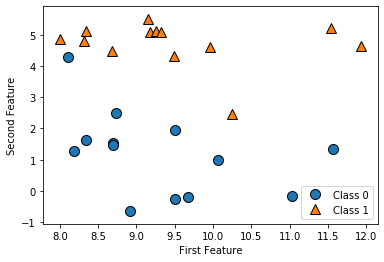

In [1]:
# create a dataset to pay with for Binary Classification 
import mglearn
import matplotlib.pyplot as plt
X, y = mglearn.datasets.make_forge()

# plot the dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc = 4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print(f'X.shape: {X.shape}')

Text(0, 0.5, 'Target')

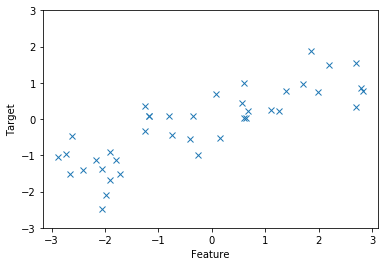

In [2]:
# create a dataset to pay with for Regression
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'x')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [3]:
# we will also use the Cancer and Boston Housing datasets
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston

### __K - Nearest Neighbors__ (Classification)

The k-NN algorithm is arguably the simplest machine learning algorithm. Building
the model consists only of storing the training dataset. To make a prediction for a
new data point, the algorithm finds the closest data points in the training dataset—its
“nearest neighbors.”

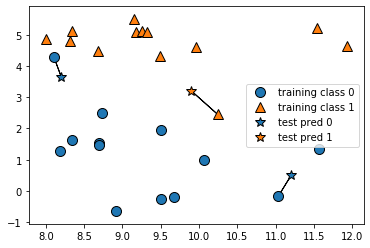

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


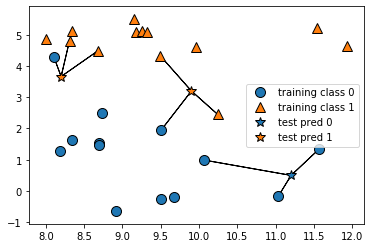

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

While this illustration is for a binary classification problem, this method can be
applied to datasets with any number of classes. For more classes, we count how many
neighbors belong to each class and again predict the most common class.

In [6]:
# implement KNN with scikit learn
from sklearn.model_selection import train_test_split

In [7]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [8]:
# import classifier class and initialize it
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)

In [9]:
# fit the classifier or model to the training data
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [10]:
# Evaluate model
print(f'test accuracy: {classifier.score(X_test, y_test):.2f}')

test accuracy: 0.86


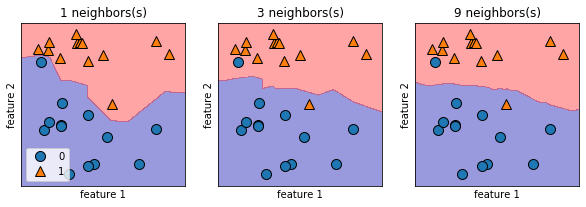

In [11]:
# plotting the decisions boundary for the KNN classifier
fig, axes = plt.subplots(1, 3, figsize = (10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can
    # instantiate and fit one line
    classifier = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(classifier, X, fill = True, eps = 0.5, ax = ax, alpha = 0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title(f'{n_neighbors} neighbors(s)')
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')

axes[0].legend(loc = 3)
plt.show()

As you can see on the left in the figure, using a single neighbor results in a decision
boundary that follows the training data closely. Considering more and more neigh bors leads to a smoother decision boundary. A smoother boundary corresponds to a
simpler model. In other words, using few neighbors corresponds to high model com plexity.

If you
consider the extreme case where the number of neighbors is the number of all data
points in the training set, each test point would have exactly the same neighbors (all
training points) and all predictions would be the same: the class that is most frequent
in the training set.

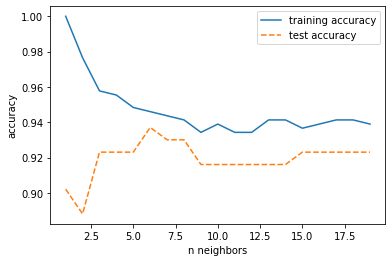

In [12]:
# Evaluate training and test set performance with different numbers
# of neighbors with the cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    # build the model
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    # fit to training set
    model.fit(X_train, y_train)
    # record training and test sets accuracies
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label = 'training accuracy', )
plt.plot(neighbors_settings, test_accuracy,'--', label = 'test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n neighbors')
plt.legend()
plt.show()

#### __K - Nearest Neighbors__ (Reggresion)

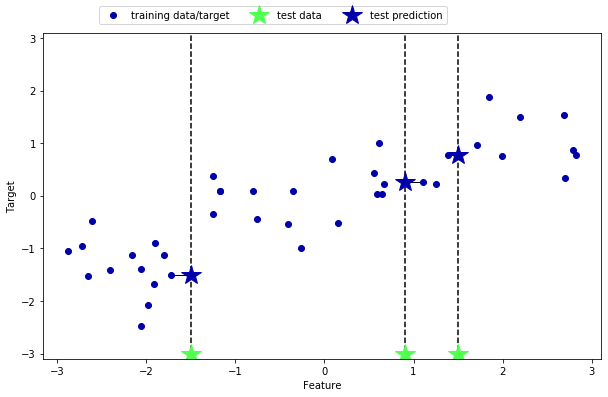

In [13]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

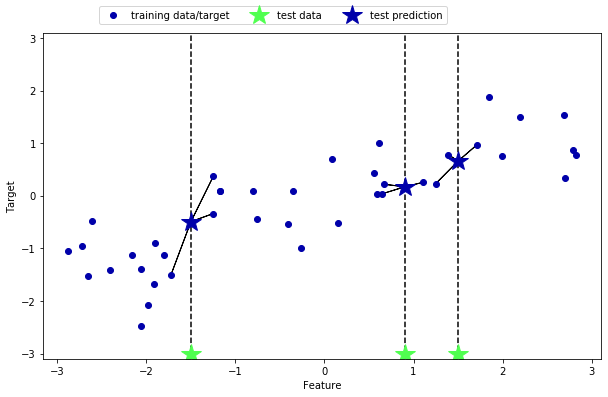

In [14]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

When using
multiple nearest neighbors, the prediction is the average, or mean, of the relevant
neighbors

The k-nearest neighbors algorithm for regression is implemented in the KNeighbors
Regressor class in scikit-learn . It’s used similarly to KNeighborsClassifier :

In [15]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# instantiate the model and set the number of neighbors to consider to 3
reggresion = KNeighborsRegressor(n_neighbors = 3)

# fit the regressor
reggresion.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [16]:
# evaluate the modeñ
print(f'test set r_squared: {reggresion.score(X_test, y_test):.2f}')

test set r_squared: 0.83


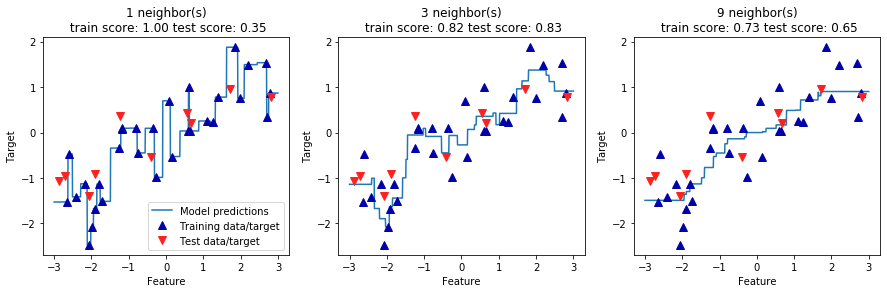

In [17]:
# Analyzing KNeighbors Regressor
fig, axes = plt.subplots(1, 3, figsize = (15, 4))

# create 1,000 datapoints evenly spaced between -3 and 3
import numpy as np
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    regression = KNeighborsRegressor(n_neighbors = n_neighbors)
    regression.fit(X_train, y_train)
    ax.plot(line, regression.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    
    train_score, test_score = regression.score(X_train, y_train), regression.score(X_test, y_test)
    ax.set_title(f'{n_neighbors} neighbor(s)\n train score: {train_score:.2f} test score: {test_score:.2f}')
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')

axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc = 'best')
plt.show()

As we can see from the plot, using only a single neighbor, each point in the training
set has an obvious influence on the predictions, and the predicted values go through
all of the data points. This leads to a very unsteady prediction. Considering more
neighbors leads to smoother predictions, but these do not fit the training data as well.

In principle, there are two important parameters to the KNeighbors classifier: the
number of neighbors and how you measure distance between data points. In practice,
using a small number of neighbors like three or five often works well, but you should
certainly adjust this parameter. Choosing the right distance measure is somewhat
beyond the scope of this book. By default, Euclidean distance is used, which works
well in many settings.

This approach often does not perform well on datasets with many features
(hundreds or more), and it does particularly badly with datasets where most features
are 0 most of the time (so-called sparse datasets).

### __Linear Models for Regression__

For regression, the general prediction formila for a linear model looks as follows:

$$ \hat{y} = w[0] x [0] + w[1]x[1] + ... + w[p]x[p] + b $$

Here, x[0] to x[p] denotes the features (in this example, the number of features is p)
of a single data point, w and b are parameters of the model that are learned, and ŷ is
the prediction the model makes.

Here, w[0] is the slope and b is the y-axis offset. For more features, w contains the
slopes along each feature axis. Alternatively, you can think of the predicted response
as being a weighted sum of the input features, with weights (which can be negative)
given by the entries of w.

w[0]: 0.393906  b: -0.031804


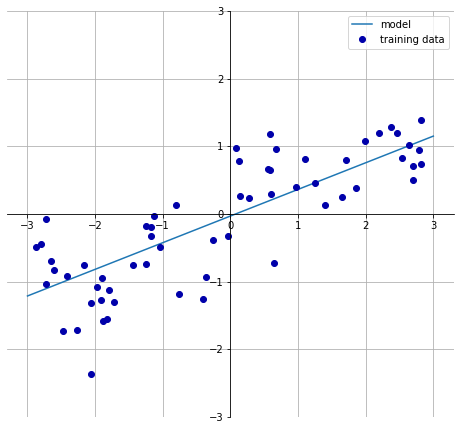

In [18]:
mglearn.plots.plot_linear_regression_wave()

Linear models for regression can be characterized as regression models for which the
prediction is a line for a single feature, a plane when using two features, or a hyperplane in higher dimensions (that is, when using more features).

If you compare the predictions made by the straight line with those made by the
KNeighborsRegressor using a straight line to make predictions seems
very restrictive. It looks like all the fine details of the data are lost. In a sense, this is
true. It is a strong (and somewhat unrealistic) assumption that our target y is a linear
combination of the features. But looking at one-dimensional data gives a somewhat
skewed perspective. For datasets with many features, linear models can be very powerful.
In particular, if you have more features than training data points, any target y
can be perfectly modeled (on the training set) as a linear function.

Linear regression, or ordinary least squares (OLS), is the simplest and most classic lin‐
ear method for regression. Linear regression finds the parameters w and b that mini‐
mize the mean squared error between predictions and the true regression targets, y,
on the training set. The mean squared error is the sum of the squared differences
between the predictions and the true values. Linear regression has no parameters,
which is a benefit, but it also has no way to control model complexity.

In [19]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# instantiate and fit to train set
lr = LinearRegression().fit(X_train, y_train)

In [20]:
# print attributes of the model
print(f'coefficient: {lr.coef_}')
print(f'interception: {lr.intercept_:.2f}')

coefficient: [0.39390555]
interception: -0.03


You might notice the strange-looking trailing underscore at the end
of coef_ and intercept_ . scikit-learn always stores anything
that is derived from the training data in attributes that end with a
trailing underscore. That is to separate them from parameters that
are set by the user.

In [21]:
# evaluate performance
print(f'training set score: {lr.score(X_train, y_train):.2f}')
print(f'test set score: {lr.score(X_train, y_train):.2f}')

training set score: 0.67
test set score: 0.67


An r_quared of around 0.66 is not very good, but we can see that the scores on the training
and test sets are very close together. This means we are likely underfitting, not overfitting. For this one-dimensional dataset, there is little danger of overfitting, as the
model is very simple (or restricted). However, with higher-dimensional datasets
(meaning datasets with a large number of features), linear models become more powerful, and there is a higher chance of overfitting. Let’s take a look at how LinearRe
gression performs on a more complex dataset, like the Boston Housing dataset.
Remember that this dataset has 506 samples and 105 derived features. First, we load
the dataset and split it into a training and a test set. Then we build the linear regression model as before:

In [22]:
# loading extended boston and fitting with a LinearRegression
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

In [23]:
print(f'training set score: {lr.score(X_train, y_train):.2f}')
print(f'test set score: {lr.score(X_test, y_test):.2f}')


training set score: 0.95
test set score: 0.61


This discrepancy between performance on the training set and the test set is a clear
sign of overfitting, and therefore we should try to find a model that allows us to control complexity. One of the most commonly used alternatives to standard linear
regression is ridge regression,

#### __Ridge Regression__

In __ridge__ regression,
though, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to
zero. Intuitively, this means each feature should have as little effect on the outcome as
possible (which translates to having a small slope), while still predicting well. This
constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression is known as __L2 regularization__. Mathematically, Ridge penalizes the __L2__ norm of the coefficients, or the __Euclidean length__ of w.

In [24]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print(f'training set score: {ridge.score(X_train, y_train):.2f}')
print(f'test set score: {ridge.score(X_test, y_test):.2f}')

training set score: 0.89
test set score: 0.75


As you can see, the training set score of Ridge is lower than for LinearRegression ,
while the test set score is higher. This is consistent with our expectation. With linear
regression, we were overfitting our data. __Ridge__ is a more __restricted__ model, so we are
_less likely_ to __overfit__.

As we are only interested in generalization perfor‐
mance, we should choose the Ridge model over the LinearRegression model.

The Ridge model makes a trade-off between the simplicity of the model (near-zero
coefficients) and its performance on the training set. How much importance the
model places on simplicity versus training set performance can be specified by the
user, using the alpha parameter.

The optimum setting of alpha depends on the particular dataset we are using.
Increasing alpha forces coefficients to move more toward zero, which decreases
training set performance but might help generalization.

In [25]:
# initialize regressor with alpha parameter to 10
# and fitting to training dataset
ridge_alpha_10 = Ridge(alpha = 10).fit(X_train, y_train)

In [26]:
print(f'training set score: {ridge_alpha_10.score(X_train, y_train):.2f}')
print(f'test set score: {ridge_alpha_10.score(X_test, y_test):.2f}')

training set score: 0.79
test set score: 0.64


For very small values of alpha , coefficients are barely restricted at all,
and we end up with a model that resembles LinearRegression:

In [28]:
ridge_alpha_0p1 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge_alpha_0p1.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge_alpha_0p1.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


We can also get a more qualitative insight into how the alpha parameter changes the
model by inspecting the coef_ attribute of models with different values of alpha . A
higher alpha means a more restricted model, so we expect the entries of coef_ to
have smaller magnitude for a high value of alpha than for a low value of alpha.

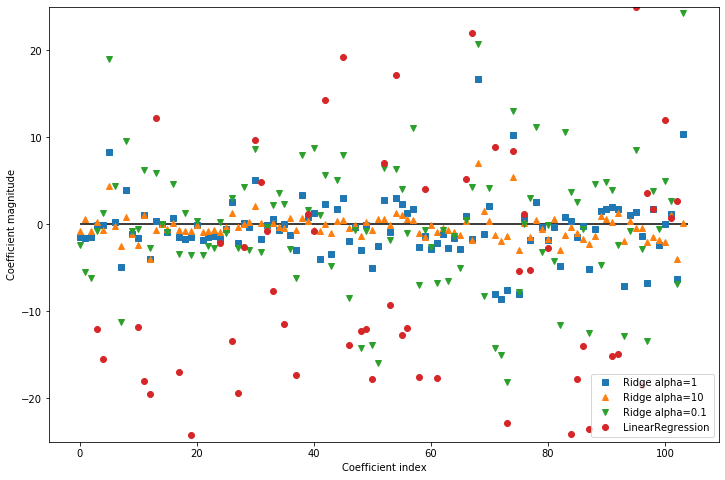

In [29]:
plt.figure(figsize = (12, 8))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge_alpha_10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge_alpha_0p1.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

Here, the x-axis enumerates the entries of coef_ : x=0 shows the coefficient associated
with the first feature, x=1 the coefficient associated with the second feature, and so on
up to x=100 . The y-axis shows the numeric values of the corresponding values of the
coefficients. The main takeaway here is that for alpha=10 , the coefficients are mostly
between around –3 and 3. The coefficients for the Ridge model with alpha=1 are
somewhat larger. The dots corresponding to alpha=0.1 have larger magnitude still,
and many of the dots corresponding to linear regression without any regularization
(which would be alpha=0 ) are so large they are outside of the chart.

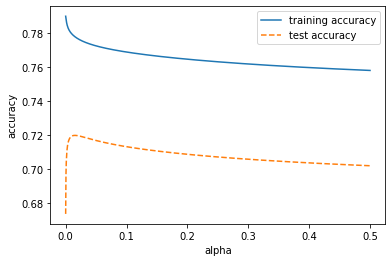

In [30]:
# Evaluate training and test set performance with different alpha
# parameter in the Ridge regressor
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Ridge
import numpy as np
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []
alpha_params = np.linspace(0, 0.5, 1000)

for alpha in alpha_params:
    # build the model
    model = Ridge(alpha = alpha)
    # fit to training set
    model.fit(X_train, y_train)
    # record training and test sets accuracies
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

plt.plot(alpha_params, training_accuracy, label = 'training accuracy', )
plt.plot(alpha_params, test_accuracy,'--', label = 'test accuracy')
plt.ylabel('accuracy')
plt.xlabel('alpha')
plt.legend()
plt.show()

Another way to understand the influence of regularization is to fix a value of alpha
but vary the amount of training data available.

We subsampled the
Boston Housing dataset and evaluated LinearRegression and Ridge(alpha=1) on
subsets of increasing size (plots that show model performance as a function of dataset
size are called __learning curves__)

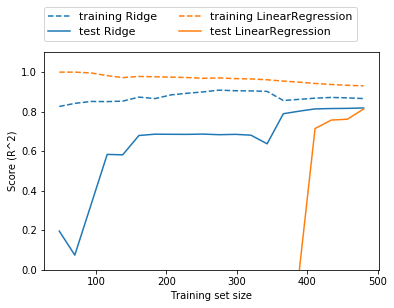

In [31]:
mglearn.plots.plot_ridge_n_samples()

As one would expect, the training score is higher than the test score for all dataset
sizes, for both ridge and linear regression. Because ridge is regularized, the training
score of ridge is lower than the training score for linear regression across the board.
However, the test score for ridge is better, particularly for small subsets of the data.
For less than 400 data points, linear regression is not able to learn anything. As more
and more data becomes available to the model, both models improve, and linear
regression catches up with ridge in the end. The lesson here is that __with enough training data, regularization becomes less important, and given enough data, ridge and
linear regression will have the same performance__.
If more data
is added, it becomes harder for a model to overfit, or memorize the data.

#### __Lasso__

An alternative to Ridge for regularizing linear regression is Lasso . As with ridge
regression, using the lasso also restricts coefficients to be close to zero, but in a
slightly different way, called __L1 regularization__. The lasso penalizes the __L1__ norm of the coefficient vector - or in other words, the sum of the absolute values of
the coefficients.

The consequence of L1 regularization
is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to
interpret, and can reveal the most important features of your model.

In [32]:
# apply Lasso to the extended Boston Housing dataset
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(f"Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Training set score: 0.56
Test set score: 0.50
Number of features used: 2


As you can see, Lasso does quite badly, both on the training and the test set. This
indicates that we are underfitting, and we find that it used only 4 of the 105 features.
Similarly to Ridge , the Lasso also has a regularization parameter, alpha , that controls
how strongly coefficients are pushed toward zero. In the previous example, we used
the default of alpha=1.0 . To reduce underfitting, let’s try decreasing alpha . When we
do this, we also need to increase the default setting of max_iter (the maximum number of iterations to run)

In [33]:
lasso_alpha_0p01 = Lasso(alpha = 0.01, max_iter = 1000000).fit(X_train, y_train)
print(f"Training set score: {lasso_alpha_0p01.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso_alpha_0p01.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso_alpha_0p01.coef_ != 0)}")

Training set score: 0.70
Test set score: 0.66
Number of features used: 8


A lower alpha allowed us to fit a more complex model, which worked better on the
training and test data. This makes this model potentially easier to under‐
stand.
If we set alpha too low, however, we again remove the effect of regularization and end
up overfitting, with a result similar to LinearRegression :

In [34]:
lasso_alpha_0p0001 = Lasso(alpha = 0.0001, max_iter = 1000000).fit(X_train, y_train)
print(f"Training set score: {lasso_alpha_0p0001.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso_alpha_0p0001.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso_alpha_0p0001.coef_ != 0)}")

Training set score: 0.77
Test set score: 0.72
Number of features used: 22


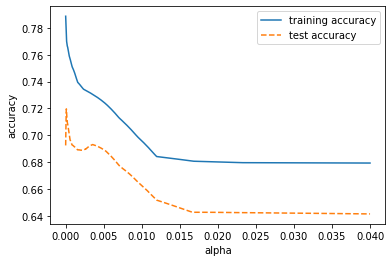

In [35]:
# Evaluate training and test set performance with different alpha
# parameter in the Ridge regressor
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Lasso
import numpy as np


training_accuracy = []
test_accuracy = []
alpha_params = np.linspace(0.00001, 0.04, 10000)

for idx, alpha in enumerate(alpha_params):
    print(f'Processing model {idx}/{len(alpha_params)}', end = '\r')
    # build the model
    model = Lasso(alpha = alpha, max_iter = 10000000)
    # fit to training set
    model.fit(X_train, y_train)
    # record training and test sets accuracies
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

plt.plot(alpha_params, training_accuracy, label = 'training accuracy', )
plt.plot(alpha_params, test_accuracy,'--', label = 'test accuracy')
plt.ylabel('accuracy')
plt.xlabel('alpha')
plt.legend()
plt.show()

Again, we can plot the coefficients of the different models

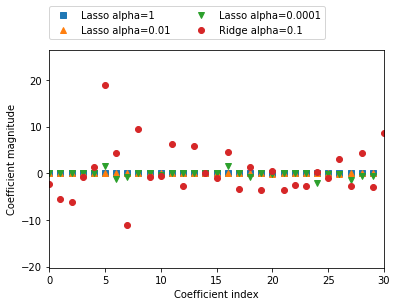

In [36]:
plt.figure()
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso_alpha_0p01.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso_alpha_0p0001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge_alpha_0p1.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.xlim(0, 30)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

In practice, ridge regression is usually the first choice between these two models.
However, if you have a large amount of features and expect only a few of them to be
important, Lasso might be a better choice. Similarly, if you would like to have a
model that is easy to interpret, Lasso will provide a model that is easier to under‐
stand, as it will select only a subset of the input features. scikit-learn also provides
the ElasticNet class, which combines the penalties of Lasso and Ridge . In practice,
this combination works best, though at the price of having two parameters to adjust:
one for the L1 regularization, and one for the L2 regularization.

### __Linear models for classification__

__Linear models are also extensively used for classification__. Let’s look at binary classifi‐
cation first. In this case, a prediction is made using the following formula:

$$ \hat{y} = x[0]x[0] + w[1]x[1] + ... + w[p]x[p] + b > 0 $$

The formula looks very similar to the one for linear regression, but instead of just
returning the weighted sum of the features, we threshold the predicted value at zero.
If the function is smaller than zero, we predict the class $ –1 $; if it is larger than zero, we
predict the class $ +1 $. This prediction rule is common to all linear models for classification. Again, there are many different ways to find the coefficients $ (w) $  and the intercept $ (b) $.

For linear models for regression, the output, $ ŷ $, is a linear function of the features: a
line, plane, or hyperplane (in higher dimensions). __For linear models for classification,
the decision boundary is a linear function of the input. In other words, a (binary) linear classifier is a classifier that separates two classes using a line, a plane, or a hyperplane.__

There are many algorithms for learning linear models. These algorithms all differ in
the following two ways:
 - The way in which they measure how well a particular combination of coefficients
and intercept fits the training data
 - If and what kind of regularization they use

The two most common linear classification algorithms are logistic regression, implemented in linear_model.LogisticRegression , and linear support vector machines
(linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classifier). Despite its name, LogisticRegression is a classification algorithm and not a
regression algorithm, and it should not be confused with LinearRegression.

/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


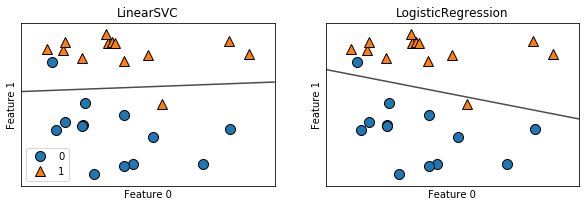

In [37]:
# apply logistic reggresion and linearSVC to the forge dataset
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    classifier = model.fit(X, y)
    mglearn.plots.plot_2d_separator(classifier, X, fill = False, eps = 0.5,
                                    ax = ax, alpha = 0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title(f'{classifier.__class__.__name__}')
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

axes[0].legend()
plt.show()

We display the decision boundaries found by
LinearSVC and LogisticRegression respectively as straight lines, separating the area
classified as class 1 on the top from the area classified as class 0 on the bottom. In
other words, any new data point that lies above the black line will be classified as class
1 by the respective classifier, while any point that lies below the black line will be classified as class 0.

The two models come up with similar decision boundaries. Note that both misclas‐
sify two of the points. By default, both models apply an __L2__ regularization, in the same
way that Ridge does for regression.
For __LogisticRegression__ and __LinearSVC__ the __trade-off parameter that determines the
strength of the regularization is called C__, and higher values of C correspond to less
regularization. In other words, when you use a high value for the parameter  C , LogisticRegression and LinearSVC try to fit the training set as best as possible, while with
low values of the parameter C  , the models put more emphasis on finding a coefficient
vector $ (w) $ that is close to zero.

There is another interesting aspect of how the parameter C acts. Using low values of C
will cause the algorithms to try to adjust to the “majority” of data points, while using
a higher value of C stresses the importance that each individual data point be classified correctly.

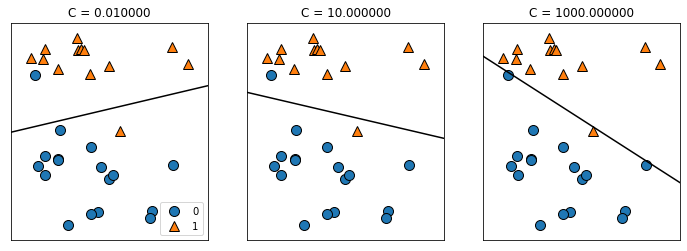

In [38]:
mglearn.plots.plot_linear_svc_regularization()

On the lefthand side, we have a very small C corresponding to a lot of regularization.
Most of the points in class 0 are at the top, and most of the points in class 1 are at the
bottom. The strongly regularized model chooses a relatively horizontal line, misclas‐
sifying two points. In the center plot, C is slightly higher, and the model focuses more
on the two misclassified samples, tilting the decision boundary. Finally, on the right‐
hand side, the very high value of C in the model tilts the decision boundary a lot, now
correctly classifying all points in class 0. One of the points in class 1 is still misclassi‐
fied, as it is not possible to correctly classify all points in this dataset using a straight
line. The model illustrated on the righthand side tries hard to correctly classify all
points, but might not capture the overall layout of the classes well. In other words,
this model is likely overfitting.

Similarly to the case of regression, linear models for classification might seem very
restrictive in low-dimensional spaces, only allowing for decision boundaries that are
straight lines or planes. Again, __in high dimensions, linear models for classificationbecome very powerful, and guarding against overfitting becomes increasingly important when considering more features.__

In [40]:
# analyze LinearLogistic in more detail
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 42
)


In [43]:
logreg = LogisticRegression(max_iter = 100000).fit(X_train, y_train)
print(f'training set score: {logreg.score(X_train, y_train):.3f}')
print(f'test set score: {logreg.score(X_test, y_test):.3f}')

training set score: 0.958
test set score: 0.958


In [45]:
logreg_100 = LogisticRegression(C = 100, max_iter = 100000).fit(X_train, y_train)
print(f'training set score: {logreg_100.score(X_train, y_train):.3f}')
print(f'test set score: {logreg_100.score(X_test, y_test):.3f}')

training set score: 0.984
test set score: 0.965


Using C=100 results in higher training set accuracy, and also a slightly increased test
set accuracy, confirming our intuition that a more complex model should perform
better.
We can also investigate what happens if we use an even more regularized model than
the default of C=1 , by setting C=0.01 :

In [47]:
logreg_0p01 = LogisticRegression(C = 0.01, max_iter = 100000).fit(X_train, y_train)
print(f'training set score: {logreg_0p01.score(X_train, y_train):.3f}')
print(f'test set score: {logreg_0p01.score(X_test, y_test):.3f}')

training set score: 0.953
test set score: 0.951


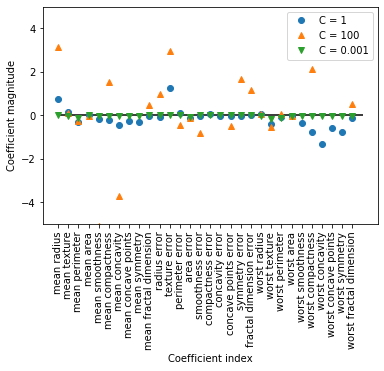

In [54]:
# lets look at the coefficients learned by the models with
# the three different settings of the regularization parameter C
plt.figure()
plt.plot(logreg.coef_.T, 'o', label = 'C = 1')
plt.plot(logreg_100.coef_.T, '^', label = 'C = 100')
plt.plot(logreg_0p01.coef_.T, 'v', label = 'C = 0.001')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.legend()
plt.show()

training accuracy of l1 logreg with C = 0.001: 0.95
test accuracy of l1 logreg with C = 0.001: 0.94
training accuracy of l1 logreg with C = 1.000: 0.96
test accuracy of l1 logreg with C = 1.000: 0.96
training accuracy of l1 logreg with C = 100.000: 0.98
test accuracy of l1 logreg with C = 100.000: 0.97


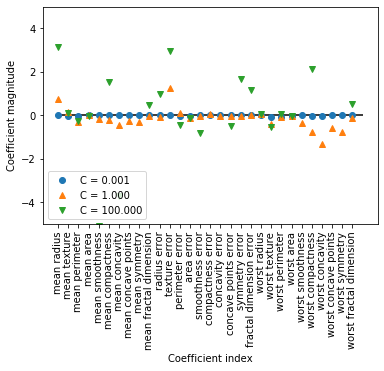

In [59]:
# If we desire a more interpretable model, using L1 regularization might help, as it lim‐
# its the model to using only a few features. Here is the coefficient plot and
# classification accuracies for L1 regularization
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l2 = LogisticRegression(C = C, penalty = 'l2', max_iter = 100000).fit(X_train, y_train)
    print(f'training accuracy of l1 logreg with C = {C:.3f}: {lr_l2.score(X_train, y_train):.2f}')
    print(f'test accuracy of l1 logreg with C = {C:.3f}: {lr_l2.score(X_test, y_test):.2f}')
    plt.plot(lr_l2.coef_.T, marker, label = f'C = {C:.3f}')

# plotting results
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

plt.ylim(-5, 5)
plt.legend(loc = 3)
plt.show()

### __Linear models for multiclass classification__

Many linear classification models are for binary classification only, and don’t extend
naturally to the multiclass case (with the exception of logistic regression). A common
technique to extend a binary classification algorithm to a multiclass classification
algorithm is the __one-vs.-rest approach__. In the one-vs.-rest approach, __a binary model is
learned for each class that tries to separate that class from all of the other classes,
resulting in as many binary models as there are classes. To make a prediction, all
binary classifiers are run on a test point. The classifier that has the highest score on its
single class “wins,” and this class label is returned as the prediction.__

The mathematics behind multiclass logistic regression differ somewhat from the one-
vs.-rest approach, but they also result in one coefficient vector and intercept per class,
and the same method of making a prediction is applied.

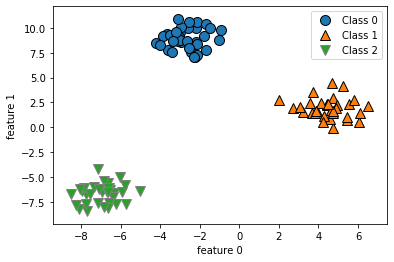

In [60]:
# apply the one-vs-rest method to a simple three class
# classification dataset
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2'])
plt.show()

In [61]:
# train a LinearSVC classifier on the dataset
linear_svm = LinearSVC().fit(X, y)
print('Coefficient shape: ', linear_svm.coef_.shape)
print('Intercept shape: ', linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


We see that the shape of the coef_ is (3, 2) , meaning that each row of coef_ contains the coefficient vector for one of the three classes and each column holds the
coefficient value for a specific feature (there are two in this dataset). The intercept_
is now a one-dimensional array, storing the intercepts for each class.

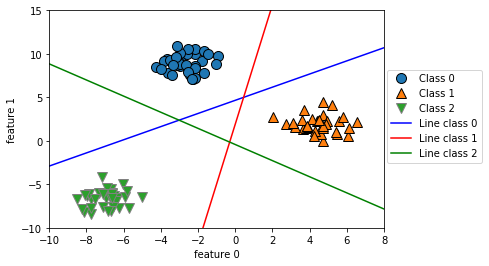

In [64]:
# let's visualize the lines given by the three binary classifiers
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
    plt.ylim(-10, 15)
    plt.xlim(-10, 8)
    plt.xlabel('feature 0')
    plt.ylabel('feature 1')
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
                'Line class 2'], loc = (1.01, 0.3))

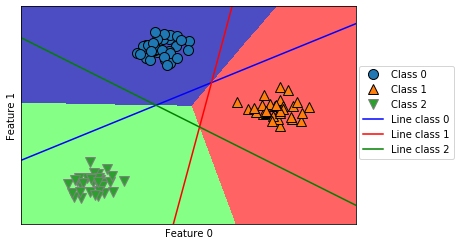

In [69]:
# the following example shows the predictions for all
# the regions of the 2D space
mglearn.plots.plot_2d_classification(linear_svm, X, fill = True, alpha = 0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)

plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


The main parameter of linear models is the regularization parameter, called alpha in
the regression models and C in LinearSVC and LogisticRegression . Large values for
alpha or small values for C mean simple models. In particular for the regression models, tuning these parameters is quite important. Usually C and alpha are searched for
on a logarithmic scale. The other decision you have to make is whether you want to
use L1 regularization or L2 regularization. If you assume that only a few of your features are actually important, you should use L1. Otherwise, you should default to L2.
L1 can also be useful if interpretability of the model is important. As L1 will use only
a few features, it is easier to explain which features are important to the model, and
what the effects of these features are.


Linear models are very fast to train, and also fast to predict. They scale to very large
datasets and work well with sparse data. If your data consists of hundreds of thousands or millions of samples, you might want to investigate using the solver='sag'
option in LogisticRegression and Ridge , which can be faster than the default on
large datasets. Other options are the SGDClassifier class and the SGDRegressor
class, which implement even more scalable versions of the linear models described
here.


Another strength of linear models is that they make it relatively easy to understand
how a prediction is made, using the formulas we saw earlier for regression and classification. Unfortunately, it is often not entirely clear why coefficients are the way they
are. This is particularly true if your dataset has highly correlated features; in these
cases, the coefficients might be hard to interpret.

## __Naive Bayes Classifiers__

Naive Bayes classifiers are similar to the linear models. They tend to be faster in training. The price paid is these models often provide generalization performance that is slightly worse than
that of linear classifiers.

The reason that naive Bayes models are so efficient is __that they learn parameters by
looking at each feature individually and collect simple per-class statistics from each
feature__.

There are three kinds of naive Bayes classifiers implemented in ```scikit-learn```:
 - ```GaussianNB```
 - ```BernoulliNB```
 - ```MultinomialNB```
 
__GaussianNB__ can be applied to any continuous data, while __BernoulliNB__ assumes binary data and __MultinomialNB__ 
assumes count data (that is, that each feature represents an integer count of something, like how often a word appears in a sentence). __BernoulliNB__ and __MultinomialNB__
are mostly used in text data classification.

The __BernoulliNB__ classifier counts how often every feature of each class is not zero.
__MultinomialNB__ takes into account the
average value of each feature for each class, while __GaussianNB__ stores the average value
as well as the standard deviation of each feature for each class.

MultinomialNB and BernoulliNB have a single parameter, alpha , which controls
model complexity. The way alpha works is that the algorithm adds to the data alpha
many virtual data points that have positive values for all the features. This results in a
“smoothing” of the statistics. A large alpha means more smoothing, resulting in less
complex models. The algorithm’s performance is relatively robust to the setting of
alpha , meaning that setting alpha is not critical for good performance. However,
tuning it usually improves accuracy somewhat.
GaussianNB is mostly used on very high-dimensional data, while the other two variants of naive Bayes are widely used for sparse count data such as text. MultinomialNB
usually performs better than BinaryNB , particularly on datasets with a relatively large
number of nonzero features (i.e., large documents).
The naive Bayes models share many of the strengths and weaknesses of the linear
models. They are very fast to train and to predict, and the training procedure is easy
to understand. The models work very well with high-dimensional sparse data and are
relatively robust to the parameters. Naive Bayes models are great baseline models and
are often used on very large datasets, where training even a linear model might take
too long.

## __Decision Trees__